# Принятие решений в бизнесе на основе данных

В качестве аналитика крупного интернет-магазина вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки.


Необходимо приоритизировать гипотезы, провести A/B-тест и проанализовать результаты

## Приоритизация гипотез

### Импорт данных

In [1]:
#  импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import datetime as dt

from IPython.core.display import HTML
HTML("<style>.rendered_html th {max-width: 50px;}</style>")

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#  импортируем данные
df_hypos = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
df_hypos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
df_hypos

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Подготовлено 9 гипотез для увеличения выручки, гипотезы проранжированы по показателям: Reach, Impact, Confidence, Effort

In [5]:
df_hypos.columns = ['hypothesis','reach','impact','confidence','efforts']

In [6]:
df_hypos

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


### Проведение приоритезации

In [7]:
#  вводим в таблицу поля с расчетом приоритезации гипотез по методам ICE и RICE
df_hypos['ice'] = df_hypos['impact'] * df_hypos['confidence'] / df_hypos['efforts']
df_hypos['rice'] = df_hypos['reach'] * df_hypos['impact'] * df_hypos['confidence'] / df_hypos['efforts']

In [8]:
df_hypos_ice = df_hypos.sort_values(by = 'ice',ascending=False)
df_hypos_ice

,hypothesis,reach,impact,confidence,efforts,ice,rice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


Наиболее высокий приоритет по методике ICE у гипотез 9, 1, 8, 7

In [9]:
df_hypos_rice = df_hypos.sort_values(by = 'rice',ascending=False)
df_hypos_rice

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


Наиболее высокий приоритет по методике RICE у гипотез 8, 3, 1, 7

### Выводы

Разница в значениях приоритета гипотез по методикам ICE и RICE связана с тем, что в методике RICE дополнительно учитывается охват аудитории прогнозируемыми изменениями

## Анализ A/B-теста

### Импорт и подготовка данных

In [10]:
#  импортируем результаты проведенного A/B-тестирования
df_orders = pd.read_csv('/datasets/orders.csv')
df_visitors = pd.read_csv('/datasets/visitors.csv')

In [11]:
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [12]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [13]:
df_orders.columns = ['transactionid', 'visitorid', 'date', 'revenue', 'group']

In [14]:
df_orders.duplicated().sum() #  проверка на дубликаты

0

In [15]:
unique_visitors = df_orders.groupby('visitorid').agg({'group':'nunique'}).sort_values(by='group',ascending=False)
ununique_count = unique_visitors[unique_visitors['group']>1].count()
print('В результатах содержатся данные о {} пользователях, которые оказались в обеих группах исследования'.format(ununique_count[0]))

В результатах содержатся данные о 58 пользователях, которые оказались в обеих группах исследования


In [16]:
df_visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [17]:
df_visitors.duplicated().sum() #  проверка на дубликаты

0

### Построение сводной таблицы

In [18]:
df_orders['date'] = df_orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
df_visitors['date'] = df_visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [19]:
visitorsADaily = df_visitors[df_visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsBDaily = df_visitors[df_visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [20]:
#  вводим кумулятивные показатели
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [21]:
ordersADaily = (
    df_orders[df_orders['group'] == 'A'][['transactionid', 'visitorid','date', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersBDaily = (
    df_orders[df_orders['group'] == 'B'][['transactionid', 'visitorid','date', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [22]:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [23]:
#  объединяем в одну таблицу
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  31 non-null     datetime64[ns]
 1   ordersPerDateA        31 non-null     int64         
 2   revenuePerDateA       31 non-null     int64         
 3   ordersPerDateB        31 non-null     int64         
 4   revenuePerDateB       31 non-null     int64         
 5   ordersCummulativeA    31 non-null     int64         
 6   revenueCummulativeA   31 non-null     int64         
 7   ordersCummulativeB    31 non-null     int64         
 8   revenueCummulativeB   31 non-null     int64         
 9   visitorsPerDateA      31 non-null     int64         
 10  visitorsPerDateB      31 non-null     int64         
 11  visitorsCummulativeA  31 non-null     int64         
 12  visitorsCummulativeB  31 non-null     int64         
dtypes: datetime64[ns](1), 

### Кумулятивная выручка по группам

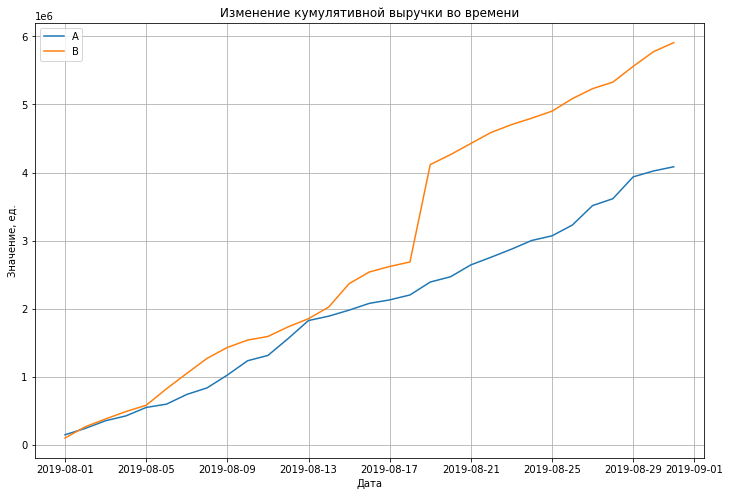

In [25]:
plt.figure(figsize=(12,8))
plt.plot(data['date'],data['revenueCummulativeA'],label='A')
plt.plot(data['date'],data['revenueCummulativeB'],label='B')
plt.title('Изменение кумулятивной выручки во времени')
plt.xlabel('Дата')
plt.ylabel('Значение, ед.')
plt.legend()
plt.grid(True)
plt.show()

Кумулятивная выручка по сегментам линейно растет.

Сегмент В в целом лучше себя проявляет; после во второй половине исследования имеет место резкий скачок графика, который свидетельствует о наличии вбросов

### Кумулятивный средний чек по группам

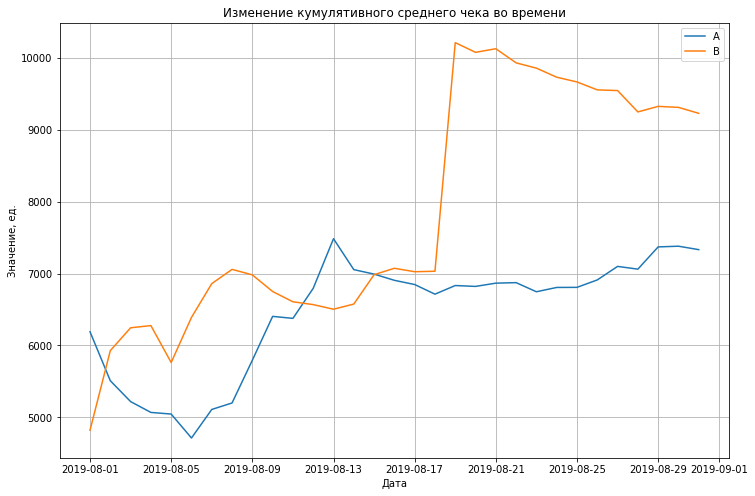

In [26]:
plt.figure(figsize=(12,8))
plt.plot(data['date'],data['revenueCummulativeA']/data['ordersCummulativeA'],label='A')
plt.plot(data['date'],data['revenueCummulativeB']/data['ordersCummulativeB'],label='B')
plt.title('Изменение кумулятивного среднего чека во времени')
plt.xlabel('Дата')
plt.ylabel('Значение, ед.')
plt.legend()
plt.grid(True)
plt.show()

В тот же период, что и на предыдущем графике, заметен резкий всплеск стоимости среднего чека группы В и последующее плавное снижение

### Относительное изменение кумулятивного среднего чека группы B к группе A.

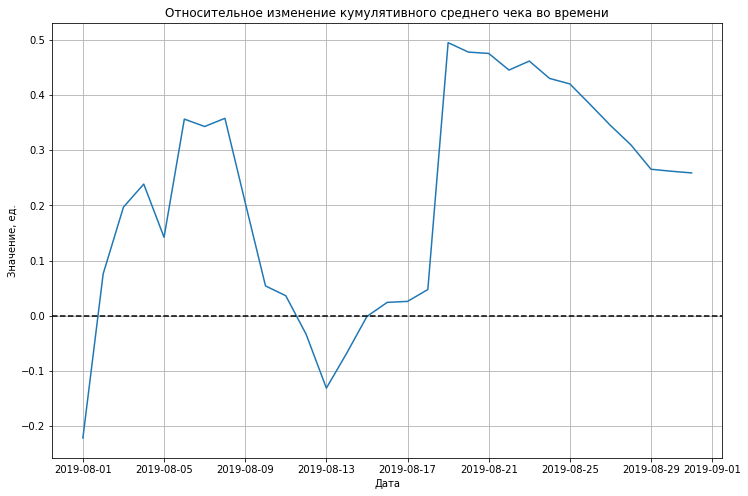

In [27]:

plt.figure(figsize=(12,8))
plt.plot(data['date'],(data['revenueCummulativeB']/data['ordersCummulativeB']
                      )/(data['revenueCummulativeA']/data['ordersCummulativeA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Относительное изменение кумулятивного среднего чека во времени')
plt.xlabel('Дата')
plt.ylabel('Значение, ед.')
plt.grid(True)
plt.show()

На графике отчетливо фиксируются скачки значений, что явно свидетельсвует о вбросах

### Кумулятивная конверсия по группам

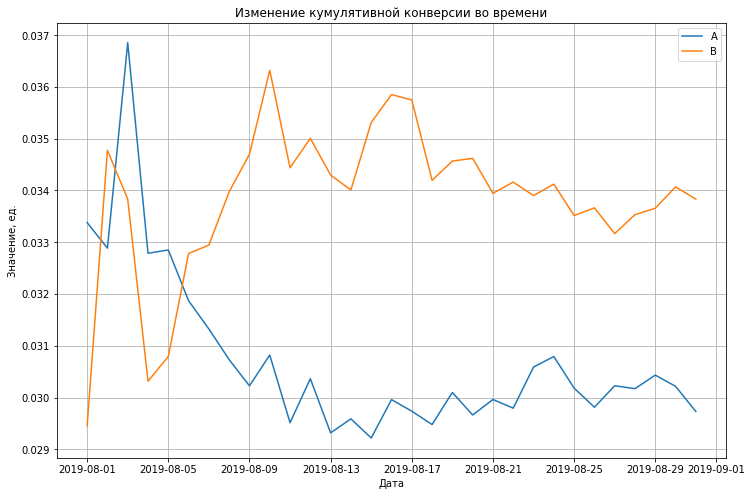

In [28]:
plt.figure(figsize=(12,8))
plt.plot(data['date'],data['ordersCummulativeA']/data['visitorsCummulativeA'],label='A')
plt.plot(data['date'],data['ordersCummulativeB']/data['visitorsCummulativeB'],label='B')
plt.title('Изменение кумулятивной конверсии во времени') 
plt.xlabel('Дата')
plt.ylabel('Значение, ед.')
plt.legend()
plt.grid(True)
plt.show()

После первоначальных колебаний значения конверсии по группам зафиксировались вокруг значения 0,034 (группа В) и значения 0,030 (группа А) 

### Относительное изменение кумулятивной конверсии группы В к группе А

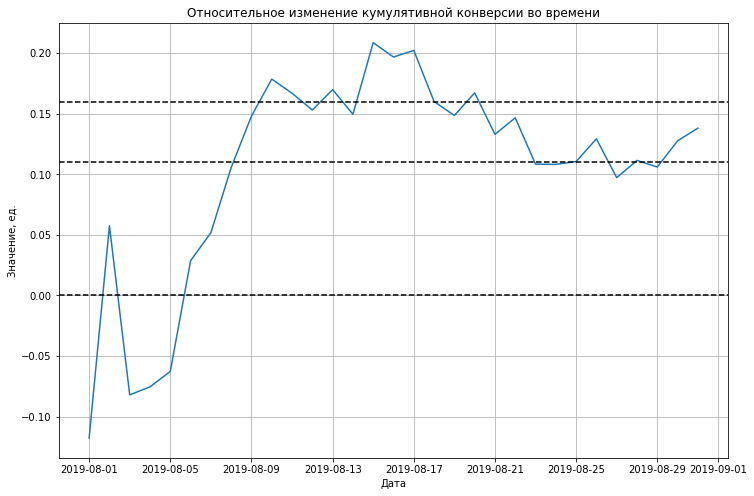

In [29]:
plt.figure(figsize=(12,8))
plt.plot(data['date'],(data['ordersCummulativeB']/data['visitorsCummulativeB']
                      )/(data['ordersCummulativeA']/data['visitorsCummulativeA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.11, color='black', linestyle='--') 
plt.axhline(y=0.16, color='black', linestyle='--') 
plt.title('Относительное изменение кумулятивной конверсии во времени') 
plt.xlabel('Дата')
plt.ylabel('Значение, ед.')
plt.grid(True)
plt.show()

График относительного изменения конверсии меняется от бурного роста к стабильным колебаниям и обратно, возможно имеются некие аномалии

### Число заказов на одного пользователя

In [30]:
ordersByUsers = (
    df_orders.drop(['date','revenue','group'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

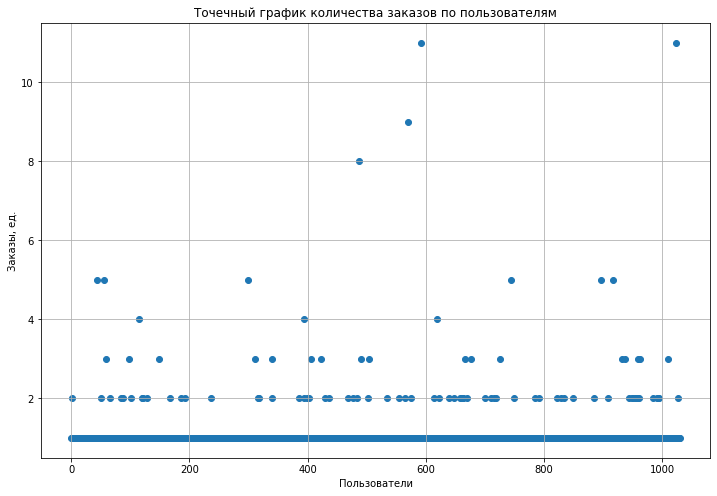

In [31]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(12,8))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям') 
plt.xlabel('Пользователи')
plt.ylabel('Заказы, ед.')
plt.grid(True)
plt.show()

В основном пользователи совершили по одному заказу, однако заметное число делает по 2-3 заказа за период

### Расчет перцентилей количества заказов на пользователя

In [32]:
orders_percentile = np.percentile(ordersByUsers['orders'], [90, 95, 99])
orders_percentile

array([1., 2., 4.])

Не более 5% посетителей совершило более 2-х заказов и не более 1% - больше 4 заказов

### Стоимость заказов на пользователя

In [33]:
revenueByUsers = (
    df_orders.drop(['transactionid','date','group'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({'revenue': pd.Series.sum})
)

ordersByUsers.columns = ['userId', 'revenue']

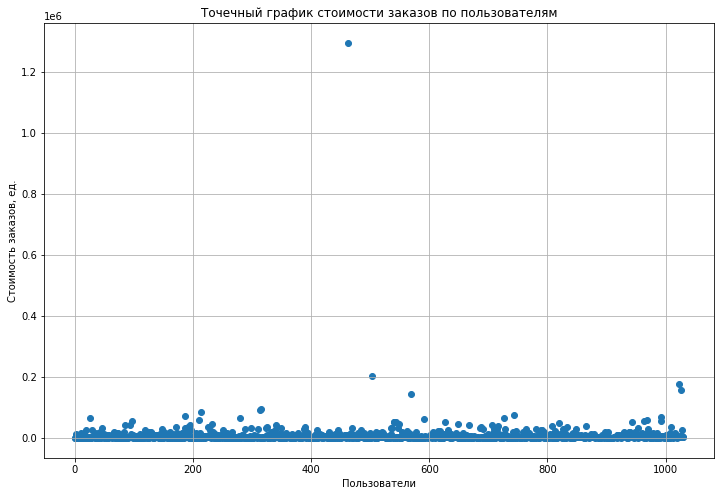

In [34]:
r_values = pd.Series(range(0,len(revenueByUsers)))
plt.figure(figsize=(12,8))
plt.scatter(r_values, revenueByUsers['revenue'])
plt.title('Точечный график стоимости заказов по пользователям') 
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов, ед.')
plt.grid(True)
plt.show()

Большая часть заказов по стоимости не превышают 100 тыс., заказы более 150 тыс. относятся к вбросам, в том числе более 1200 тыс.

### Расчет перцентилей стоимости заказов на пользователя

In [35]:
revenue_percentile = np.percentile(revenueByUsers['revenue'], [90, 95, 99])
revenue_percentile

array([19260. , 32899.5, 67750. ])

Стоимость не более 5% заказов превышает 32900, и не более 1% заказов - 67750

### Статистическая значимость различий в конверсии между группами по "сырым" данным

In [36]:
ordersByUsersA = (
    df_orders[df_orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    df_orders[df_orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [37]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [38]:
print('Статистическая значимость различия конверсии по группам составила {0:.3f}. Нулевую гипотезу отвергаем'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))


Статистическая значимость различия конверсии по группам составила 0.008. Нулевую гипотезу отвергаем


In [39]:
print('Относительное различие конверсии группы В к группе А составляет {0:.1%}'.format(sampleB.mean() / sampleA.mean() - 1))

Относительное различие конверсии группы В к группе А составляет 13.8%


### Статистическая значимость различий в среднем чеке заказа между группами по "сырым" данным

In [40]:
print('Статистическая значимость различий в среднем чеке по группам составила {0:.3f}. Значимых различий нет, нулевую гипотезу не отвергаем'.format(stats.mannwhitneyu(df_orders[df_orders['group']=='A']['revenue'], df_orders[df_orders['group']=='B']['revenue'])[1]))


Статистическая значимость различий в среднем чеке по группам составила 0.365. Значимых различий нет, нулевую гипотезу не отвергаем


In [41]:
print('Относительное различие среднего чека группы В к группе А составляет {0:.1%}'.format(df_orders[df_orders['group']=='B']['revenue'].mean()/df_orders[df_orders['group']=='A']['revenue'].mean()-1)) 

Относительное различие среднего чека группы В к группе А составляет 25.9%


### Подоготовка "очищенных" данных

С учетом ранее полученных данных отнесем к аномальным пользователям, совершающим более 2 заказов или заказов на сумму более 40 тыс. По количеству совершенных заказов исключаются 5% пользователей и от 1% до 5% заказов по стоимости

In [42]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = df_orders[df_orders['revenue'] > 40000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Количество аномальных пользователей составило {:.0f} человек'.format(abnormalUsers.shape[0]))

Количество аномальных пользователей составило 45 человек


### Формулирование нулевой и альтернативной гипотезы

Принимаем нулевую гипотезу - показатели (конверсия, средний чек) в группах А и В равны. Уровень статистической значимости составляет 0.05 (alpha = 0.05). Альтернативная гипотеза - показатели (конверсия, средний чек) в группах А и В не равны

### Статистическая значимость различий в конверсии между группами по "очищенным" данным

In [43]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [44]:
print('Статистическая значимость различия конверсии по группам по "очищенным" данным составила {0:.3f}. Нулевую гипотезу отвергаем'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
#print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Статистическая значимость различия конверсии по группам по "очищенным" данным составила 0.003. Нулевую гипотезу отвергаем


In [45]:
print('Относительное различие конверсии группы В к группе А по "очищенным" данным составляет {0:.1%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

Относительное различие конверсии группы В к группе А по "очищенным" данным составляет 18.8%


В результате исключения аномальных данных статистически значимое различие усилилось, относительное различие конверсии группы В к группе А возросло

### Статистическая значимость различий в среднем чеке заказа между группами по "очищенным" данным

In [46]:
print('Статистическая значимость различий в среднем чеке по группам по "очищенным" данным составила {0:.3f}. Значимых различий нет, нулевую гипотезу не отвергаем'.format(stats.mannwhitneyu(
            df_orders[np.logical_and(df_orders['group'] == 'A',
                    np.logical_not(df_orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            df_orders[np.logical_and(df_orders['group'] == 'B',
                    np.logical_not(df_orders['visitorid'].isin(abnormalUsers)),)]['revenue'],)[1]))


Статистическая значимость различий в среднем чеке по группам по "очищенным" данным составила 0.472. Значимых различий нет, нулевую гипотезу не отвергаем


In [47]:
print(
    'Относительное различие среднего чека группы В к группе А по "очищенным" данным составляет {0:.1%}'.format(
        df_orders[np.logical_and(df_orders['group'] == 'B',
                np.logical_not(df_orders['visitorid'].isin(abnormalUsers)),)]['revenue'].mean()
        / df_orders[np.logical_and(df_orders['group'] == 'A',
                np.logical_not(df_orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean() - 1)) 

Относительное различие среднего чека группы В к группе А по "очищенным" данным составляет 5.8%


В результате исключения аномальных данных статистически значимое различие уменьшилось, относительное различие конверсии группы В к группе А уменьшилось за счет исключения нехарактерных, особо крупных заказов

## Выводы

По итогам проведенного А/В-тестирования гипотезы проведен анализ полученных данных. Выявлено 58 пользователей, которые были отнесены к обеим группам, при подготовке данных по тестированию рекомендуется обеспечить разделение пользователей на группы.

В группе В зафиксирован рост конверсии, различия по статистическому критерию Манна-Уитни признаны значимыми. При этом значимых различий в среднем чеке между группами по данному критерию не обнаружено. Уточненный расчет без учета влияния аномальных пользователей (заказов) также подтвердил полученные данные. Исключение аномальных данных (более частые и дорогие заказы) привело к относительному росту конверсии и снижению среднего чека.

В связи с тем, что имеются данные о росте конверсии, а средний чек при этом не уменьшается, тест рекомендуется завершить, признать за группой В победу и с целью увеличения выручки внедрить исследуемую гипотезу.

